In [2]:
import pandas as pd
from sqlalchemy import create_engine
import os
import urllib.parse
import seaborn as sns

In [3]:
amazon_df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
display(amazon_df)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [15]:
# Part 1,  1:

amazon_df.shape
amazon_df.dtypes
frequency_table = amazon_df['category'].value_counts()
frequency_table2 = frequency_table.head(5)
frequency_table2

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

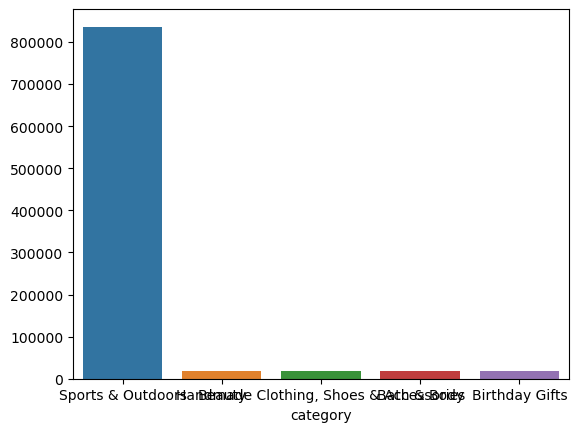

In [5]:
# 2 : 
sns.barplot(x=frequency_table2.index, y=frequency_table2.values);

<Axes: ylabel='count'>

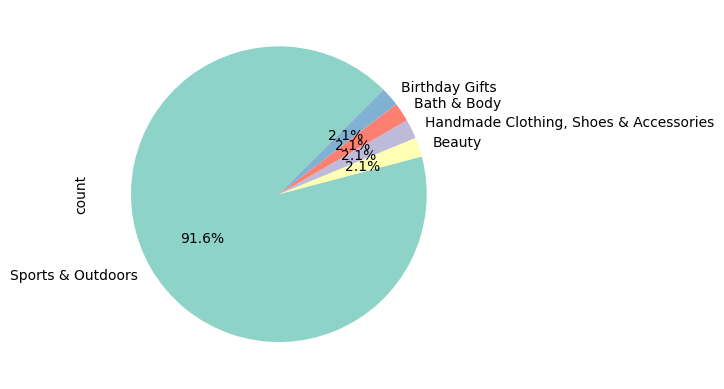

In [6]:
frequency_table2.plot.pie(autopct='%1.1f%%', startangle=45, colors=sns.color_palette("Set3"))

In [17]:
# Part 2,  1:
mean = amazon_df['price'].mean()
median = amazon_df['price'].median()
mode = amazon_df['price'].mode()[0]
print (f'mean : {mean}')
print (f'median : {median}')
print (f'mode : {mode}')

# the average price is 89 while the mode is only 9.99. 
# Which means that there are some very expensive products in the catalog.

mean : 89.24380943923663
median : 19.09
mode : 9.99


In [18]:
# 2 : 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
describe = amazon_df['price'].describe()
variance_price = amazon_df['price'].var()
display(describe)
skewness_price = amazon_df['price'].skew()
variance_price, skewness_price 
# we can observe a Positive skew: Tail on the right. Mean > Median > Mode 
# there are some outliers on 'price'

count   2443651.00
mean         89.24
std         345.61
min           0.00
25%           9.99
50%          19.09
75%          45.99
max      100000.00
Name: price, dtype: float64

(119445.48532256528, 27.492977566280338)

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

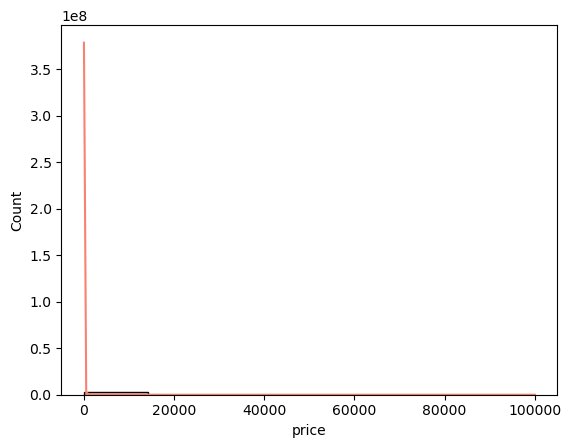

In [20]:
# 3 : 
sns.histplot(amazon_df['price'], kde=True, bins=7, color="salmon")

# we need to drop outliers values 0 and 100000


<Axes: >

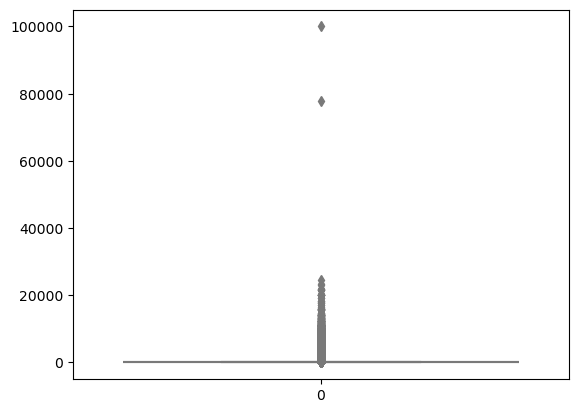

In [12]:
sns.boxplot(data = amazon_df['price'], color="lightblue")
# we can remove this 2 outliers values : around 80000 and 100000

In [25]:
# part 3, 1 : 
non_zero_df = amazon_df[amazon_df['stars'] != 0]
mean2 = non_zero_df['stars'].mean()
median2 = non_zero_df['stars'].median()
mode2 = non_zero_df['stars'].mode()[0]
print (f'mean : {mean2}')
print (f'median : {median2}')
print (f'mode : {mode2}')

mean : 4.31916076222691
median : 4.4
mode : 4.5


In [26]:
describe_rate = non_zero_df['stars'].describe()
variance_rate = non_zero_df['stars'].var()
describe_rate, variance_rate

(count   1218010.00
 mean          4.32
 std           0.56
 min           1.00
 25%           4.10
 50%           4.40
 75%           4.60
 max           5.00
 Name: stars, dtype: float64,
 0.3083433752380519)

In [28]:
skewness_rate = non_zero_df['stars'].skew()
kurtosis_rate = non_zero_df['stars'].kurtosis()
skewness_rate, kurtosis_rate
# Negative skew: Tail on the left. Mode > Median > Mean
# Low kurtosis: Light tails, fewer outliers

(-2.3795681122127945, 9.78193769066435)

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='stars', ylabel='Count'>

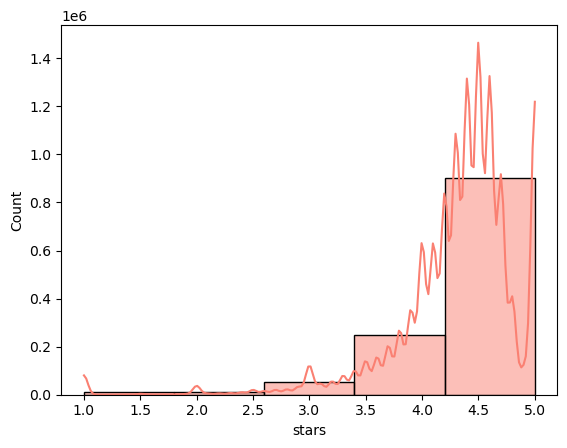

In [29]:
sns.histplot(non_zero_df['stars'], kde=True, bins=5, color="salmon")
# the more common rate is 4,5